# Making the Most of your Colab Subscription



## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.


In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
!pip install tensorflow
import tensorflow as tf
import keras.models
from tensorflow.keras.layers import Input, Dense
from keras import utils as np_utils
from keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
from keras.layers import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install keras 
import keras
import keras.utils
#!pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install keras_metrics
import keras_metrics as km

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#importing Libraries
import numpy as np 
import pandas as pd 
import os

# for generating images
import random 

#data virtualization 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns

#importing tensor-flow for model creation and its dependencies
import tensorflow as tf
print(tf.__version__)

import cv2 #read the images 
import glob #extract filenames

import torch 


import time
import torchvision.transforms as transforms
import random

2.9.2


In [7]:
from glob import glob

# for enabling inline processing
%matplotlib inline

#for accessing  mydrive  data mount on googlecolab 
from google.colab.patches import cv2_imshow

from google.colab import files

#high quality image has high intensity of color, color of matrix are represented by rbg matrix

from pathlib import Path
from datetime import datetime

from collections import namedtuple
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from tensorflow import keras

from sklearn import preprocessing
from PIL import Image
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [8]:
! pip install -q kaggle

In [9]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srvsakshi03","key":"41190edae2633d15326ff3cf72335b85"}'}

In [10]:
! mkdir ~/.kaggle

In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
#below method helped me to download datasets that are not listed in the kaggle competitions.
!kaggle datasets download -d whenamancodes/wild-animals-images -p /content/drive/MyDrive/wild-animals-images --unzip

 98% 985M/0.98G [00:04<00:00, 174MB/s]
100% 0.98G/0.98G [00:04<00:00, 222MB/s]


In [14]:
import psutil

split_bar = '='*20

def usageSummary(context):
  memory_info = psutil.virtual_memory()._asdict()
  print(f"{split_bar} Memory Usage {context} {split_bar}")
  for k,v in memory_info.items():
    print(k, v)
  print(f"{split_bar} CPU Usage {context} {split_bar}")
  print(f"CPU percent: {psutil.cpu_percent()}%")


In [15]:
class LabelledImage:
  def __init__(self, image, filePath, flattened_image, label):
    self.image = image
    self.filePath = filePath
    self.flattened_image = flattened_image
    self.label = label

#image processing technique to increase global contrast of an image using the image intensity histogram. This method needs no parameter
def hist(img):
  img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
  hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
  return hist_equalization_result

def rotation(img):
  rows,cols = img.shape[0],img.shape[1]
  randDeg = random.randint(-180, 180)
  matrix = cv2.getRotationMatrix2D((cols/2, rows/2), randDeg, 0.70)
  rotated = cv2.warpAffine(img, matrix, (rows, cols), borderMode=cv2.BORDER_CONSTANT,borderValue=(144, 159, 162))
  return rotated

def indexToLabel(Ctype, array):
  labels = []
  for x in array:
    labels.append(Ctype[x])
  return labels

def getdata(path,CType):
  trash, images = [], []
  #labels,filepaths,trash,flattened_images,images=[],[],[],[],[]
  classlist=sorted(os.listdir(path))
  print(classlist)
  for i in classlist:
    cpath=os.path.join(path, i)
    sub_directory=os.listdir(cpath)[0]
    sub_directory_path=os.path.join(cpath,sub_directory)
    # curr = 0    
    if os.path.isdir(sub_directory_path):
      subpathsortedlist=sorted(os.listdir(sub_directory_path))
      for k in range (len(CType)):
        if CType[k] in cpath:
          # Assign index value as the label from class type array          
          # Issue - change string labels to int/float
          label=k
      for j in subpathsortedlist:
        jpath=os.path.join(sub_directory_path,j)
        try: # test to ensure image files are valid image files    
            # https://stackoverflow.com/questions/40273109/convert-python-opencv-mat-image-to-tensorflow-image-data                    
            img=cv2.imread(jpath)            
            # Issue: if we dont resize it will create flattened arrays of different sizes - 
            # (198,)
            # /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.          
            img = cv2.resize(img, (224, 224))

            # # Pre processing:
            # # Reflection/HorizontalFlip/VerticalFlip
            # img = cv2.flip(img, 0) 
            # img = cv2.flip(img, 1)

            # # Histogram Equalization
            # img=hist(img)

            # # FunctionforRotation
            # img=rotation(img)
            
            # # GrayScaling
            # # convert an RGB(3 channels) image into a Gray scale image
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # img = np.expand_dims(img, axis=2)  

            # # Normalize            
            img = img/255

            # Issue 1: Need to flatten image, as SVM base model does not accept 3-d input. shape=(198, 224, 224, 3)
            images.append(LabelledImage(img, jpath, img.flatten(), label)) 

        except Exception as e:
            #print(e)
            trash.append(jpath)
        # curr += 1
        # if curr > count:
        #   break
  return trash, images

In [16]:
def splitdata(labelledImages):  
  flat_data = np.array([labelledImage.flattened_image for labelledImage in labelledImages])
  target = np.array([labelledImage.label for labelledImage in labelledImages])

  print(flat_data.shape)

  df=pd.DataFrame(flat_data) #dataframe
  df['Target']=target

  x=df.iloc[:,:-1] #input data 
  y=df.iloc[:,-1] #output data

  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=77,stratify=y)
  return x_train,x_test,y_train,y_test

In [17]:
import random
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


datasetpath=r'/content/drive/MyDrive/wild-animals-images'
CType=['cheetah', 'fox', 'hyena','lion','tiger','wolf']
n_classes = len(CType)

# get data
trash, labelledImages = getdata(datasetpath,CType)

# shuffle images to avoid bias
random.shuffle(labelledImages)

# split flattened image data
x_train,x_test,y_train,y_test=splitdata(labelledImages)

# split 2D image data and prepare x,y for CNN
# One major advantage of using CNNs over other algorithms is that you do not need to flatten the input images to 1D as they are capable of working with image data in 2D. This helps in retaining the “spatial” properties of images
images = np.array([labelledImage.image for labelledImage in labelledImages])
labels = np.array([labelledImage.label for labelledImage in labelledImages])
X_train, X_validate, X_test = np.split(images, [int(len(images)*0.8), int(len(images)*0.9)])
Y_train, Y_validate, Y_test = np.split(labels, [int(len(labels)*0.8), int(len(labels)*0.9)])

# Issue : https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# converting indices to binary format
print("Shape before one-hot encoding: ", Y_train.shape)
bY_train = np_utils.to_categorical(Y_train, n_classes)
bY_test = np_utils.to_categorical(Y_test, n_classes)
bY_validate = np_utils.to_categorical(Y_validate, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


['cheetah-resize-224', 'cheetah-resize-300', 'cheetah-resize-512', 'fox-resize-224', 'fox-resize-300', 'fox-resize-512', 'hyena-resize-224', 'hyena-resize-300', 'hyena-resize-512', 'lion-resize-224', 'lion-resize-300', 'lion-resize-512', 'tiger-resize-224', 'tiger-resize-300', 'tiger-resize-512', 'wolf-resize-224', 'wolf-resize-300', 'wolf-resize-512']
(5169, 150528)
Shape before one-hot encoding:  (4135,)
Shape after one-hot encoding:  (4135,)


#Convolutional Neural Networks with transfer learning

In [18]:
from keras.applications.vgg16 import VGG16
from tqdm.keras import TqdmCallback

# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4
# include top should be False to remove the softmax layer

StartTime=time.time()

pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

print('After VGG model')

vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_validate)

print('After VGG predict')

# After extracting features from pre-trained model, use them on an additional dense layer
usageSummary("Before CNN run")
modelWithTL = Sequential()
modelWithTL.add(Flatten(input_shape=(7,7,512)))
modelWithTL.add(Dense(100, activation='relu'))
modelWithTL.add(Dropout(0.5))
modelWithTL.add(BatchNormalization())
modelWithTL.add(Dense(n_classes, activation='softmax'))
# compile the model
modelWithTL.compile(optimizer='rmsprop', metrics=['accuracy'], loss='mean_squared_error')
modelWithTL.summary()
# train model using features generated from VGG16 model
modelWithTL.fit(vgg_features_train, bY_train, epochs=100, batch_size=100, validation_data=(vgg_features_val, bY_validate), verbose=0, callbacks=[TqdmCallback(verbose=1)])

EndTime=time.time()
print("Total training time taken ",round((EndTime-StartTime)),'seconds ####')
usageSummary("After CNN run")

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Total training time taken  50 seconds ####
==================== Memory Usage After CNN run ====================
total 89639694336
available 67320692736
percent 24.9
used 36104003584
free 44503851008
active 748040192
inactive 43622084608
buffers 342233088
cached 8689606656
shared 13897728
slab 316239872
==================== CPU Usage After CNN run ====================
CPU percent: 15.6%


In [19]:
StartTime=time.time()
# model will predict an array of probabilites for each label, the max prob will give us the most likely label for that image
Y_result = modelWithTL.predict(vgg_features_train)
Y_pred = []
for arr in Y_result:
  indices = np.where(arr == np.amax(arr))
  Y_pred.append(indices[0][0])
Y_pred = np.array(Y_pred)
Y_pred = np_utils.to_categorical(Y_pred, n_classes)

EndTime=time.time()
print("Total test time taken ",round((EndTime-StartTime)),'seconds ####')
print(f"CNN is {accuracy_score(Y_pred,bY_train)*100}% accurate")

130/130 [==============================] - 0s 2ms/step
Total test time taken  1 seconds ####
CNN is 100.0% accurate


# Convolutional Neural Networks without transfer learning

In [20]:
import keras_metrics as km

# https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/
# issue::reshape your input_image to 4D [batch_size, img_height, img_width, number_of_channels]
# p=np.expand_dims(random_test_frame,axis=0) To clarify, your input should of shape (no. of images,64,64,3) In this case no. Of images is 1 hence Your shape must be (1,64,64,3)

# Issue: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
# CNN takes advantage of pixel resprented in n-D array.
# An image is nothing but a matrix of pixel values, right? So why not just flatten the image (e.g. 3x3 image matrix into a 9x1 vector) and feed it to a Multi-Level Perceptron for classification purposes? Uh.. not really.
# In cases of extremely basic binary images, the method might show an average precision score while performing prediction of classes but would have little to no accuracy when it comes to complex images having pixel dependencies throughout.
# A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and the reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.

usageSummary("Before CNN run")

# 1rst version
cnn_model=Sequential() 
cnn_model.add(Convolution2D(16,kernel_size=(3,3),strides=(1,1),input_shape=X_train.shape[1:],activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
# cnn_model.add(Convolution2D(32,kernel_size=(3,3),strides=(1,1),activation='relu')) 
# cnn_model.add(MaxPool2D(pool_size=(2,2)))

# flattening
cnn_model.add(Flatten())

#fully connected neural Network
cnn_model.add(Dense(64,activation='relu'))
# Issue - Dense layer was expecting the output neurons size to be 1 rather than 6. 
# https://stackoverflow.com/questions/52147847/expected-shape-of-keras-dense-layer-output-with-300-units-is-1
# The problem with using sparse categorical cross-entropy is that this loss makes the assumption that the model outputs a scalar (a one element vector), and this is checked during runtime, and this check fails and that's why you get an error.
cnn_model.add(Dense(n_classes, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])

# Issue: transforming indices to binary enables us to use categorical_crossentropy which showed higher accuracy
# cnn_model.compile(optimizer='Adam', loss='mean_squared_error', metrics=["accuracy"])

# cnn_model.summary()
print(X_train.shape)
print(bY_train.shape)

history = cnn_model.fit(X_train, bY_train, epochs=100, batch_size=100, verbose=0, callbacks=[TqdmCallback(verbose=1)])
usageSummary("After CNN run")


==================== Memory Usage Before CNN run ====================
total 89639694336
available 66996772864
percent 25.3
used 36427915264
free 44179267584
active 748056576
inactive 43947311104
buffers 342257664
cached 8690253824
shared 13897728
slab 316293120
==================== CPU Usage Before CNN run ====================
CPU percent: 11.5%
(4135, 224, 224, 3)
(4135, 6)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

==================== Memory Usage After CNN run ====================
total 89639694336
available 64125345792
percent 28.5
used 39301550080
free 41090674688
active 748544000
inactive 47036534784
buffers 342708224
cached 8904761344
shared 13901824
slab 317894656
==================== CPU Usage After CNN run ====================
CPU percent: 14.6%


In [21]:
StartTime=time.time()
# model will predict an array of probabilites for each label
# the max prob will give us the most likely label for that image
Y_result = cnn_model.predict(X_test)
Y_pred = []
for arr in Y_result:
  indices = np.where(arr == np.amax(arr))
  # print(type(indices[0][0]))
  Y_pred.append(indices[0][0])
Y_pred = np.array(Y_pred)
Y_pred = np_utils.to_categorical(Y_pred, n_classes)

EndTime=time.time()
print(f"CNN is {accuracy_score(Y_pred,bY_test)*100}% accurate")

17/17 [==============================] - 0s 7ms/step
CNN is 98.25918762088975% accurate


# SVM with CNN for feature extraction

In [22]:
# https://stackoverflow.com/questions/71130269/how-to-add-a-traditional-classifiersvm-to-my-cnn-model

# 1rst version
cnn_model=Sequential() 
cnn_model.add(Convolution2D(16,kernel_size=(3,3),strides=(1,1),input_shape=X_train.shape[1:],activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Convolution2D(32,kernel_size=(3,3),strides=(1,1),activation='relu')) 
cnn_model.add(MaxPool2D(pool_size=(2,2)))

#flattening
cnn_model.add(Flatten())

#fully connected neural Network
cnn_model.add(Dense(64,activation='relu'))
# Issue - Dense layer was expecting the output neurons size to be 1 rather than 6. 
# https://stackoverflow.com/questions/52147847/expected-shape-of-keras-dense-layer-output-with-300-units-is-1
# The problem with using sparse categorical cross-entropy is that this loss makes the assumption that the model outputs a scalar (a one element vector), and this is checked during runtime, and this check fails and that's why you get an error.
cnn_model.add(Dense(6 ,activation='softmax', name='dense2'))
# cnn_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])
cnn_model.compile(optimizer='Adam', loss='mean_squared_error', metrics=["accuracy"])

model_feat = Model(inputs=cnn_model.input,outputs=cnn_model.get_layer('dense2').output)
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(X_test)


17/17 [==============================] - 0s 6ms/step


In [23]:
svm = SVC(kernel='rbf')
# print(indexToLabel(CType, Y_test))
# training
model_history=svm.fit(feat_test,Y_test)
# prediction 
y_pred=svm.predict(feat_test)
# accuracy
# print(indexToLabel(CType, y_pred))
svm.score(feat_test,Y_test)

0.2804642166344294

# SVM with flattened image

In [24]:
# https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01

#measuring the time taken by model to train
usageSummary("Before SVM run")

StartTime=time.time()
svm = SVC(kernel='rbf')
print('TYPE:', type(x_train), type(y_train))
print('SHAPE:', x_train.shape, y_train.shape)
model_history=svm.fit(x_train,y_train)
EndTime=time.time()

usageSummary("After SVM run")
print("Total training time taken ",round((EndTime-StartTime)),'seconds ####')

StartTime=time.time()
y_pred=svm.predict(x_test)
EndTime=time.time()
print("Total test time taken ",round((EndTime-StartTime)),'seconds ####')
print(f"The svm is {accuracy_score(y_pred,y_test)*100}% accurate")

svm.score(x_test,y_test)

==================== Memory Usage Before SVM run ====================
total 89639694336
available 61352894464
percent 31.6
used 42073989120
free 38318030848
active 748576768
inactive 49804509184
buffers 342732800
cached 8904941568
shared 13901824
slab 318210048
==================== CPU Usage Before SVM run ====================
CPU percent: 10.6%
TYPE: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
SHAPE: (4135, 150528) (4135,)
==================== Memory Usage After SVM run ====================
total 89639694336
available 61347926016
percent 31.6
used 47062056960
free 33326522368
active 751353856
inactive 54790598656
buffers 345419776
cached 8905695232
shared 13901824
slab 317042688
==================== CPU Usage After SVM run ====================
CPU percent: 99.1%
Total training time taken  487 seconds ####
Total test time taken  1629 seconds ####
The svm is 87.62088974854933% accurate


0.8762088974854932

# Decision Tree with CNN for feature extraction

In [26]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)

# Training
StartTime=time.time()
model_history=dt.fit(feat_train,Y_train)
EndTime=time.time()
usageSummary("After DecisionTreeClassifier run")
print("Total training time taken ",round((EndTime-StartTime)),'seconds ####')

# Accuracy
StartTime=time.time()
y_pred=dt.predict(feat_train)
print(f"The decision tree is {accuracy_score(y_pred,Y_train)*100}% accurate")
EndTime=time.time()
print("Total testing time taken ",round((EndTime-StartTime)),'seconds ####')
# dt.score(feat_train,Y_train)

==================== Memory Usage After DecisionTreeClassifier run ====================
total 89639694336
available 60961923072
percent 32.0
used 47277359104
free 33100537856
active 759427072
inactive 55002128384
buffers 353038336
cached 8908759040
shared 13910016
slab 318291968
==================== CPU Usage After DecisionTreeClassifier run ====================
CPU percent: 92.6%
Total training time taken  0 seconds ####
The decision tree is 26.723095525997582% accurate
Total testing time taken  0 seconds ####


# Decision Tree with flattened image array

In [30]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)

StartTime=time.time()
dt.fit(x_train,y_train)
EndTime=time.time()
usageSummary("After DecisionTreeClassifier run")
print("Total training time taken ",round((EndTime-StartTime)),'seconds ####')

# Accuracy
StartTime=time.time()
y_pred=dt.predict(x_test)
print(f"The decision tree is {accuracy_score(y_pred,y_test)*100}% accurate")
EndTime=time.time()
print("Total testing time taken ",round((EndTime-StartTime)),'seconds ####')

# dt.score(x_test,y_test)


==================== Memory Usage After DecisionTreeClassifier run ====================
total 89639694336
available 60164022272
percent 32.9
used 49880043520
free 30492123136
active 761970688
inactive 57602969600
buffers 355573760
cached 8911953920
shared 13910016
slab 319504384
==================== CPU Usage After DecisionTreeClassifier run ====================
CPU percent: 8.2%
Total training time taken  193 seconds ####
The decision tree is 29.40038684719536% accurate
Total testing time taken  1 seconds ####


# K Nearest Neighbor with CNN for feature extraction

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

# Training
StartTime=time.time()
model_history=knn.fit(feat_train,Y_train)
EndTime=time.time()
usageSummary("After KNeighborsClassifier run")
print("Total training time taken ",round((EndTime-StartTime)),'seconds ####')

# Accuracy
StartTime=time.time()
y_pred=knn.predict(feat_train)

print(f"The K Nearest Neighbor  is {accuracy_score(y_pred,Y_train)*100}% accurate")
EndTime=time.time()
usageSummary("After KNeighborsClassifier run")
print("Total testing time taken ",round((EndTime-StartTime)),'seconds ####')

knn.score(feat_train,Y_train)

==================== Memory Usage After KNeighborsClassifier run ====================
total 89639694336
available 60164100096
percent 32.9
used 49880375296
free 30491791360
active 761962496
inactive 57603002368
buffers 355573760
cached 8911953920
shared 13910016
slab 319475712
==================== CPU Usage After KNeighborsClassifier run ====================
CPU percent: 9.3%
Total training time taken  0 seconds ####
The K Nearest Neighbor  is 96.590084643289% accurate
==================== Memory Usage After KNeighborsClassifier run ====================
total 89639694336
available 60163813376
percent 32.9
used 49880662016
free 30491500544
active 761962496
inactive 57603002368
buffers 355573760
cached 8911958016
shared 13910016
slab 319479808
==================== CPU Usage After KNeighborsClassifier run ====================
CPU percent: 10.3%
Total testing time taken  0 seconds ####


0.96590084643289

# K Nearest Neighbor with flattened image array

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)

StartTime=time.time()
knn.fit(x_train,y_train)
EndTime=time.time()
usageSummary("After KNeighborsClassifier run")
print("Total training time taken ",round((EndTime-StartTime)),'seconds ####')

# Accuracy
StartTime=time.time()
y_pred=knn.predict(x_test)
print(f"The K Nearest Neighbor is {accuracy_score(y_pred,y_test)*100}% accurate")
usageSummary("After KNeighborsClassifier run")
print("Total testing time taken ",round((EndTime-StartTime)),'seconds ####')

# knn.score(x_test,y_test)

==================== Memory Usage After KNeighborsClassifier run ====================
total 89639694336
available 60164431872
percent 32.9
used 49880068096
free 30491963392
active 761966592
inactive 57603604480
buffers 355573760
cached 8912089088
shared 13910016
slab 319389696
==================== CPU Usage After KNeighborsClassifier run ====================
CPU percent: 9.1%
Total training time taken  1 seconds ####
The K Nearest Neighbor is 75.43520309477756% accurate
==================== Memory Usage After KNeighborsClassifier run ====================
total 89639694336
available 60164100096
percent 32.9
used 49876209664
free 30495694848
active 762052608
inactive 57599287296
buffers 355655680
cached 8912134144
shared 13910016
slab 319311872
==================== CPU Usage After KNeighborsClassifier run ====================
CPU percent: 72.5%
Total testing time taken  0 seconds ####


In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[162   6  14  21   0   2]
 [ 20 114   4   5   5   2]
 [ 23   6 127  21   2   4]
 [  6   5   8 154   2   2]
 [ 18   9  16  11 105   2]
 [  7  11   9  11   2 118]]


# Artificial Neural Networks

In [39]:
model_ann = Sequential()
model_ann.add(Dense(16, input_shape=x_train.shape[1:], activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.6))
model_ann.add(Dense(2, activation='softmax'))
model_ann.add(Flatten())

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_ann.fit(x_train, y_train,epochs=10,batch_size=100)
model_ann.summary()

Epoch 1/10
42/42 [==============================] - 2s 32ms/step - loss: 5.0582 - accuracy: 0.1671
Epoch 2/10
42/42 [==============================] - 1s 30ms/step - loss: 4.9535 - accuracy: 0.1586
Epoch 3/10
42/42 [==============================] - 1s 33ms/step - loss: 4.4529 - accuracy: 0.1640
Epoch 4/10
42/42 [==============================] - 1s 33ms/step - loss: 0.6932 - accuracy: 0.1797
Epoch 5/10
42/42 [==============================] - 1s 32ms/step - loss: 0.6932 - accuracy: 0.1838
Epoch 6/10
42/42 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.1746
Epoch 7/10
42/42 [==============================] - 1s 34ms/step - loss: 0.6931 - accuracy: 0.1734
Epoch 8/10
42/42 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.1739
Epoch 9/10
42/42 [==============================] - 1s 34ms/step - loss: 0.6931 - accuracy: 0.1816
Epoch 10/10
42/42 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.1763
Model: "s

In [41]:
StartTime=time.time()
# model will predict an array of probabilites for each label
# the max prob will give us the most likely label for that image
y_result = model_ann.predict(x_test)
y_pred = []
for arr in y_result:
  indices = np.where(arr == np.amax(arr))
  y_pred.append(indices[0][0])
y_pred = np.array(y_pred)

EndTime=time.time()
print("Total test time taken ",round((EndTime-StartTime)),'seconds ####')
print(f"ANN is {accuracy_score(y_pred,y_test)*100}% accurate")

33/33 [==============================] - 0s 11ms/step
Total test time taken  1 seconds ####
ANN is 19.825918762088975% accurate


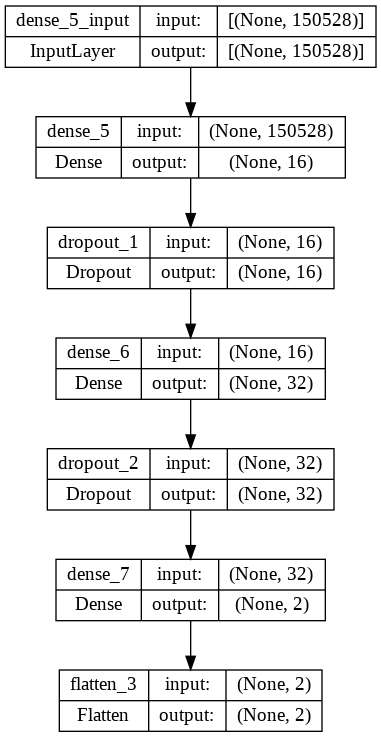

In [36]:
plot_model(model_ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

# Making Predictions from lazypredict

In [37]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
